1. Yolov5沒有發表論文，自稱Yolov5有爭議。模型架構或效能與Yolov4差異不大，但訓練較有效率，Yolov5神經網路共有4種大小版本 - Yolov5s、Yolov5m、Yolov5l、Yolov5x。
2. Yolov5神經網路和Yolov4一樣，都使用FPN+PAN的結構。深層的feature map有較強的語義特徵，較弱的定位訊息。而淺層的feature map則相反。FPN將深層的語義特徵傳到淺層，增強多尺度的語義表達。PAN將淺層的定位訊息傳到深層，增強多尺度的定位能力。
3. Yolov5和Yolov4都採用Mosaic影像增強方法，提升模型訓練效果顯著。
4. Yolov5預設9組[w,h]大小的auto anchor，神經網路最後的3層特徵圖各使用3組auto anchor，即特徵圖每個網格使用行3種尺寸的anchor box與gt(ground truth)進行比對。Yolov5訓練前會計算預設的auto anchor與gt的bpr(best possible recall)，當bpr<0.98時會重新調整anchor，使用k-means及遺傳演算法重新計算9組[w,h]大小的auto anchor。
5. Yolov3與Yolov4一個gt只匹配一個正樣本，Yolov5一個gt可以被匹配最多27個anchor，對於正負樣本平衡有幫助。
6. Yolov5的loss包含3個loss函數，(1)box loss-計算anchor與gt的ciou_loss，(2)obj loss-計算網格的confidence是否正確，使用BCEWithLogitsLoss，(3)cls loss-計算與gt相對應的anchor的分類是否正確，使用BCEWithLogitsLoss。注:box loss有giou_Loss，diou_Loss，ciou_Loss。
7. 在目標檢測的後處理中，對應一gt有很多目標框，需要進行Non-Maximum Suppression(nms)篩選。Yolov4採用diou_nms的方式，Yolov5採用weighted_nms的方式。

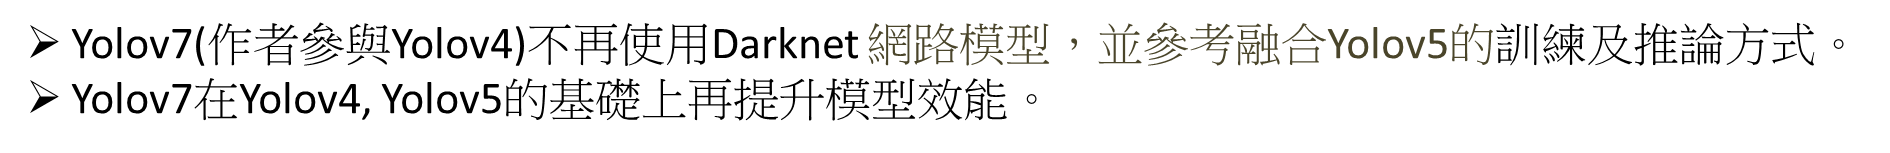

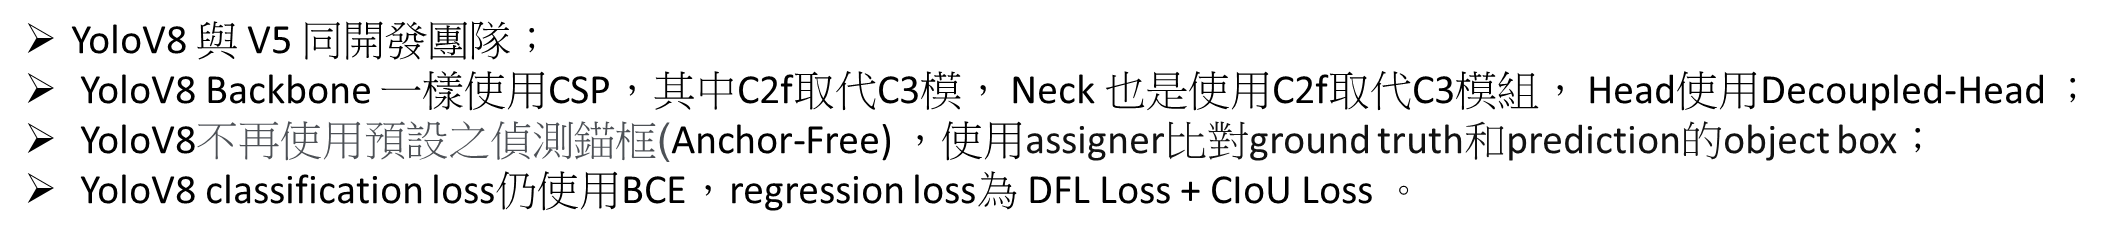

###**Reference:**

###All about yolo:


https://docs.ultralytics.com/quickstart/

https://zhuanlan.zhihu.com/p/599176351

https://zhuanlan.zhihu.com/p/599385089

https://mmyolo.readthedocs.io/zh_CN/latest/recommended_topics/algorithm_descriptions/yolov8_description.html

https://blog.csdn.net/weixin_45977690/article/details/128872473

###Real-time Object Tracking with OpenCV and YOLOv8 in Python

https://www.thepythoncode.com/article/real-time-object-tracking-with-yolov8-opencv

###Labelimage and Makesense:

https://blog.csdn.net/weixin_41010198/article/details/106378404

https://blog.csdn.net/weixin_45192980/article/details/119338209

##**pip install ultralytics**

In [1]:
!pip install ultralytics

# 使用ultralytics-8.0.168此版本，無法使用下方藍色true positive等對應圖

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.0/617.0 kB 7.2 MB/s eta 0:00:00


In [2]:
# Edit -> Notebook settings -> Hardware accelerator: GPU -> Save
!nvidia-smi  # 檢查使用哪一張顯卡

Fri Sep 15 08:45:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls /content/drive/MyDrive/yolo/data  # ls 相當於dir, 看看有哪些檔案

appleorange.zip		 convert_annotations.py  marine_litter.zip
classes_appleorange.txt  datadownloadv7.ipynb	 plate.zip
classes_plate.txt	 datadownloadv8.ipynb	 test.mp4
classes.txt		 FaceMaskDataset.zip


In [7]:
# copy over the dataset into the root directory of the Colab VM

# !cp /content/drive/MyDrive/yolo/data/FaceMaskDataset.zip /content
# !cp /content/drive/MyDrive/yolo/data/plate.zip /content
# !cp /content/drive/MyDrive/yolo/data/appleorange.zip /content
!cp /content/drive/MyDrive/yolo/data/marine_litter.zip /content

# 不從google drive解壓縮才用，直接存來content這邊使用

In [8]:
# unzip the dataset and the contents so that they are now in /content folder

# !unzip /content/FaceMaskDataset.zip -d /content/   # 口罩部分
# !unzip /content/plate.zip -d /content/   # 車牌部分
# !unzip /content/appleorange.zip -d /content/
!unzip /content/marine_litter.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/marine_litter/labels/train/20221208_新北市_福隆-390.txt  
  inflating: /content/marine_litter/labels/train/20221208_新北市_福隆-391.txt  
  inflating: /content/marine_litter/labels/train/20221208_新北市_福隆-392.txt  
  inflating: /content/marine_litter/labels/train/20221208_新北市_福隆-393.txt  
  inflating: /content/marine_litter/labels/train/20221208_新北市_福隆-394.txt  
  inflating: /content/marine_litter/labels/train/20221208_新北市_福隆-395.txt  
  inflating: /content/marine_litter/labels/train/20221208_新北市_福隆-397.txt  
  inflating: /content/marine_litter/labels/train/20221208_新北市_福隆-399.txt  
  inflating: /content/marine_litter/labels/train/20221208_新北市_福隆-401.txt  
  inflating: /content/marine_litter/labels/train/20221208_新北市_福隆-403.txt  
  inflating: /content/marine_litter/labels/train/20221208_新北市_福隆-404.txt  
  inflating: /content/marine_litter/labels/train/20221208_新北市_福隆-405.txt  
  inflating: /content/marine_litter/labels/train/

##**One class**

***建立 plate.yaml***

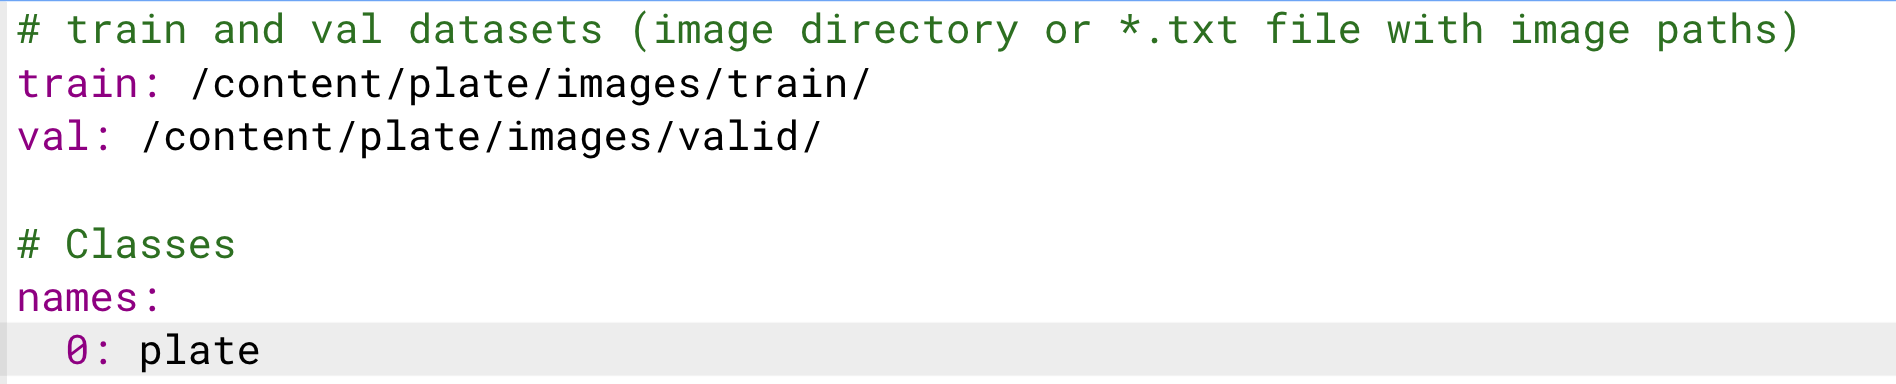



##**Multi-classes**

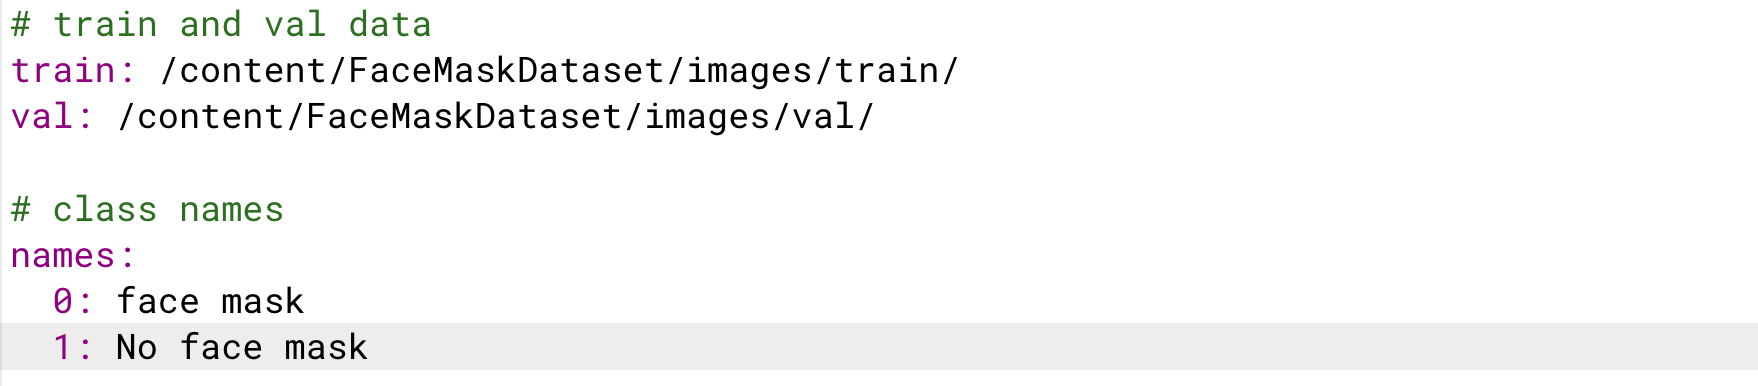

##**train custom data**

In [9]:
# https://docs.ultralytics.com/usage/cli/   # command line介面介紹，如何使用Yolov8
# https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb  # roboflow有提供訓練資料

# data: yaml file to define path to data, classes' names
# model: yolov8x.pt yolov8l.pt yolov8m.pt yolov8s.pt yolov8n.pt  # 5種size可以挑
# a full list of train arguments: https://docs.ultralytics.com/usage/cfg/   # 訓練時可以增加的參數
# augmentation 太多不一定model強，running time會增加

# !yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/yolo/yolo_v8/mask.yaml epochs=10 imgsz=256 plots=True
# !yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/yolo/yolo_v8/plate.yaml epochs=10 imgsz=256 plots=True
# !yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/yolo/yolo_v8/apple_orange.yaml epochs=10 imgsz=256 plots=True
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/yolo/yolo_v8/marine_litter.yaml epochs=10 imgsz=256 plots=True

100% 21.5M/21.5M [00:00<00:00, 194MB/s]
Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/yolo/yolo_v8/marine_litter.yaml, epochs=10, patience=50, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, re

In [25]:
## To save model weights to your google drive!

!cp '/content/runs/detect/train/weights/best.pt' /content/drive/MyDrive/yolo/yolo_v8/
!cp '/content/runs/detect/train/weights/last.pt' /content/drive/MyDrive/yolo/yolo_v8/

In [11]:
# check training metrics:

# /content/runs/detect/train/results.png
# /content/runs/detect/train/confusion_matrix.png

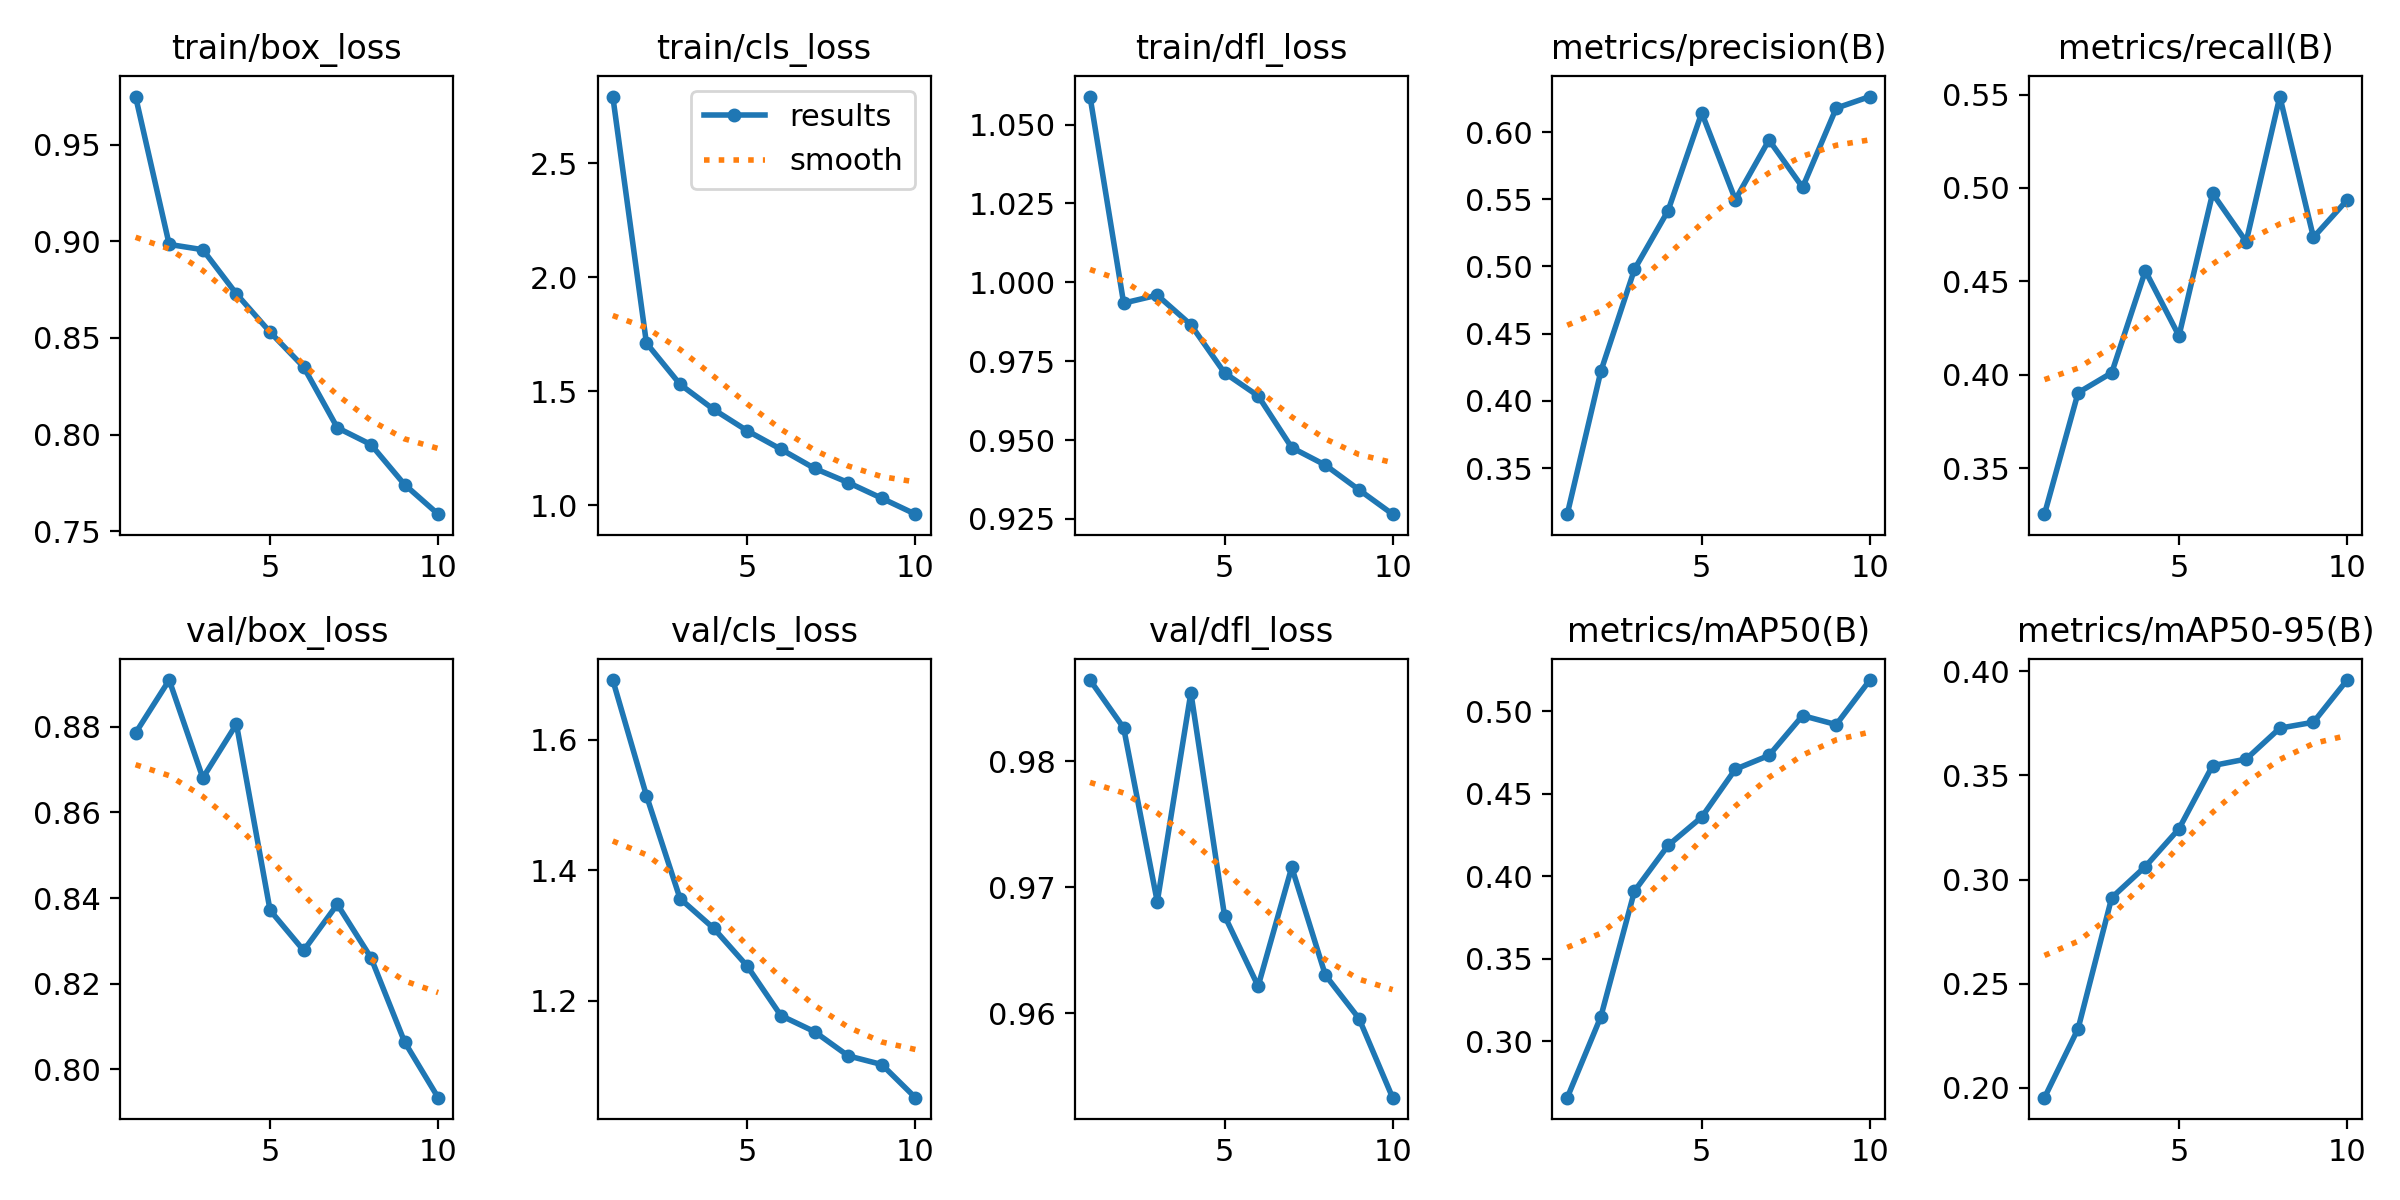

In [13]:
Image(filename='/content/runs/detect/train/results.png', width=600)

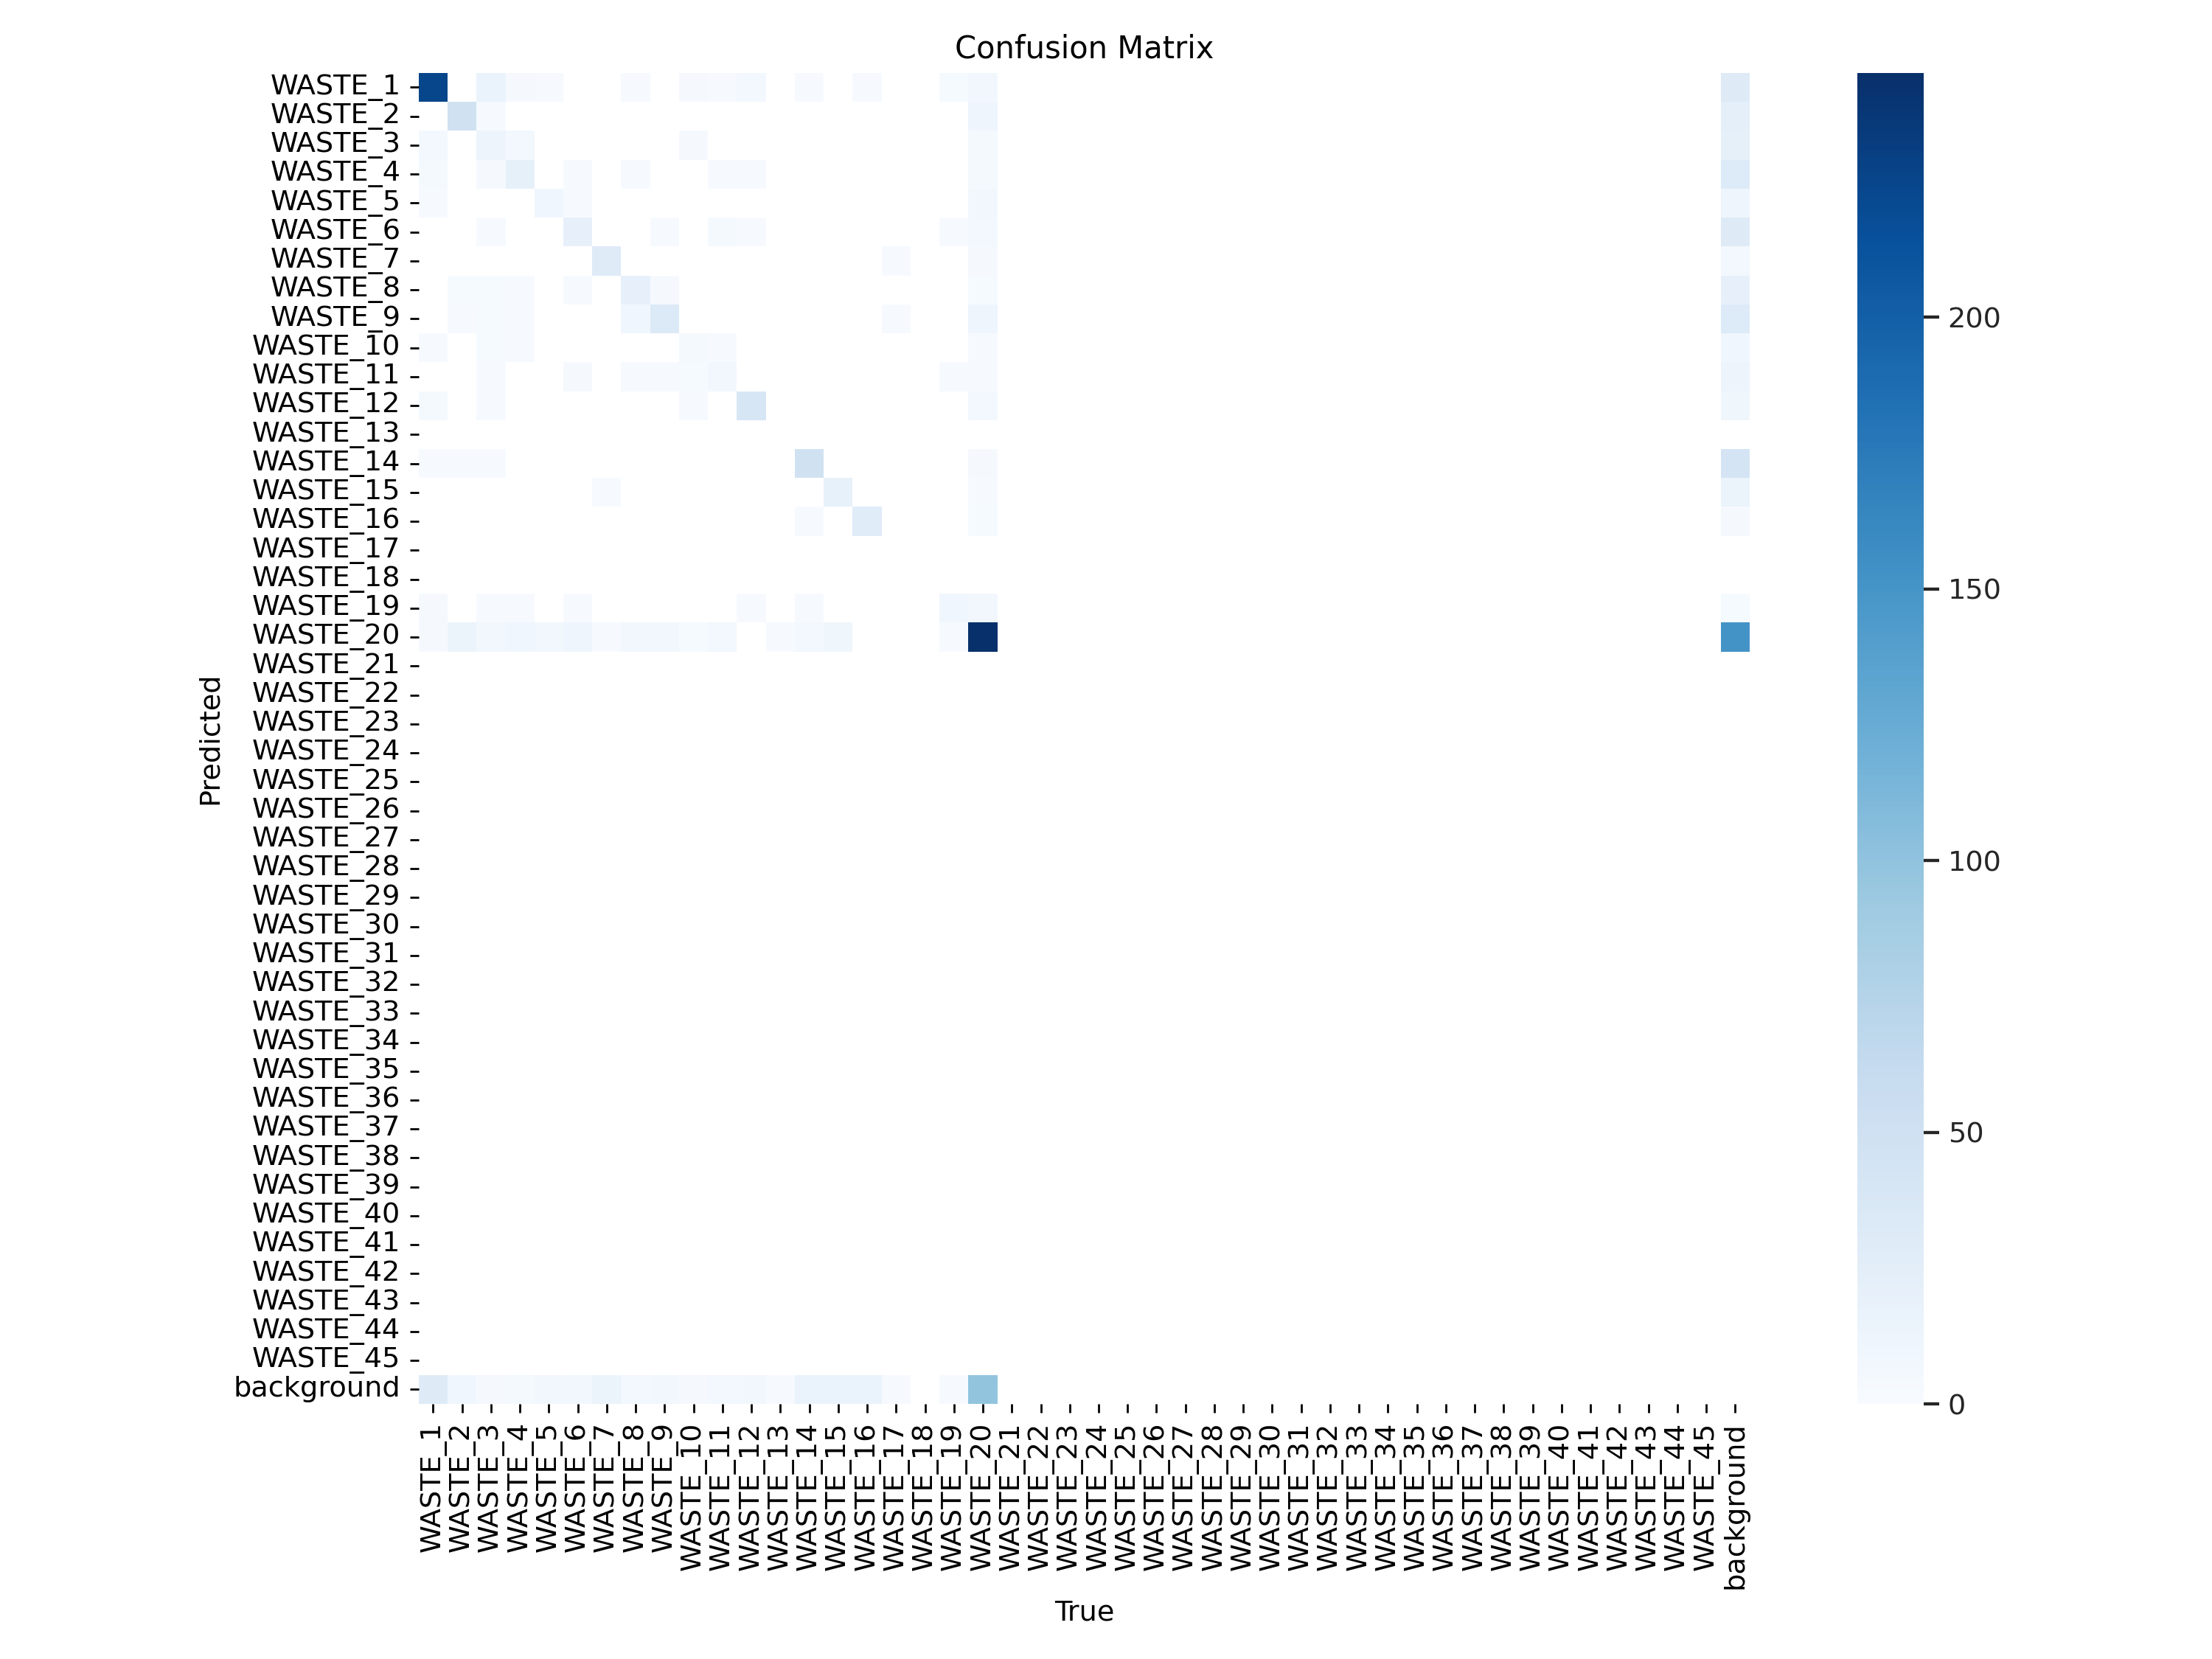

In [14]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

##**inference on test data**

In [ ]:
# 1. CLI Command Line Interface  # 此處為command line的寫法

In [16]:
# a full list of predict arguments: https://docs.ultralytics.com/usage/cfg/
# 預設 conf=0.25, iou=0.7

# !yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolo/yolo_v8/mask.jpg save=True
# 上面訓練完的程式顯示的儲存位置: /runs/detect/train
# source: 圖片存放位置
# threadshold: conf=0.25(預設) sigmoid分類的點，此處也可再添加IoU

# !yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolo/yolo_v8/plates.jpg save=True

# !yolo task=detect mode=predict model=/content/runs/detect/train5/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolo/yolo_v8/orange.jpg save=True

!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolo/yolo_v8/litter1.jpg save=True

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11142999 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/yolo/yolo_v8/litter1.jpg: 192x256 2 WASTE_1s, 1 WASTE_3, 1 WASTE_9, 1 WASTE_20, 59.6ms
Speed: 1.0ms preprocess, 59.6ms inference, 268.1ms postprocess per image at shape (1, 3, 192, 256)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


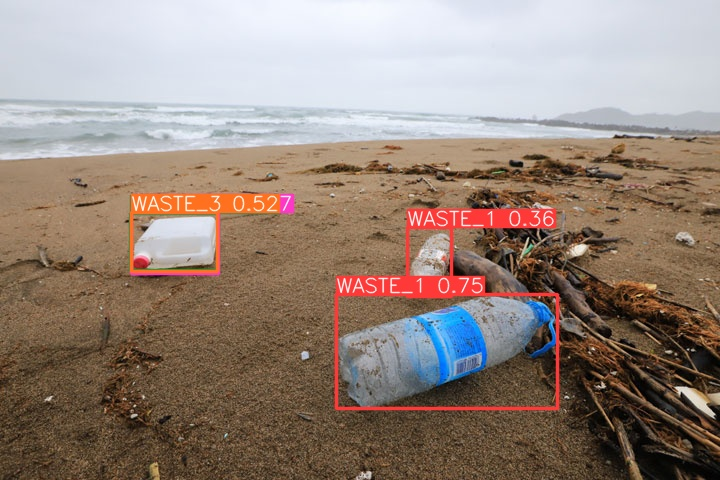

In [17]:
# display(Image(filename='/content/runs/detect/predict/mask.jpg', width=600))
# display(Image(filename='/content/runs/detect/predict/plates.jpg', width=600))
# display(Image(filename='/content/runs/detect/predict6/orange.jpg', width=600))
display(Image(filename='/content/runs/detect/predict/litter1.jpg', width=600))

In [ ]:
# 2. SDK Software Development Kit  # 此處為python寫法

In [19]:
model = YOLO('/content/runs/detect/train/weights/best.pt')  # 放權重的路徑
# results = model.predict(source='/content/drive/MyDrive/yolo/yolo_v8/mask.jpg', conf=0.25)  # 放照片的路徑
# results = model.predict(source='/content/drive/MyDrive/yolo/yolo_v8/plates.jpg', conf=0.25)
# results = model.predict(source='/content/drive/MyDrive/yolo/yolo_v8/apple.jpg', conf=0.25)
results = model.predict(source='/content/drive/MyDrive/yolo/yolo_v8/litter1.jpg', conf=0.25)


image 1/1 /content/drive/MyDrive/yolo/yolo_v8/litter1.jpg: 192x256 2 WASTE_1s, 1 WASTE_3, 1 WASTE_9, 1 WASTE_20, 105.3ms
Speed: 1.3ms preprocess, 105.3ms inference, 2.6ms postprocess per image at shape (1, 3, 192, 256)


In [20]:
# detected boxes' coordinates tensors   # 照片中框框的位置(座標)，才能做後續應用
results[0].boxes.xyxy # [xmin,ymin,xmax,ymax]

tensor([[336.9711, 294.4780, 557.8732, 408.9188],
        [131.2474, 212.5794, 217.9140, 271.9685],
        [131.2168, 212.9268, 218.1626, 273.9461],
        [130.0311, 213.0763, 218.4516, 270.9510],
        [407.7954, 227.3409, 451.7878, 296.8215]], device='cuda:0')

In [21]:
# detected boxes' coordinates arrays
results[0].boxes.xyxy.detach().cpu().numpy()   # 將tensor轉為numpy格式，以做後續計算

array([[     336.97,      294.48,      557.87,      408.92],
       [     131.25,      212.58,      217.91,      271.97],
       [     131.22,      212.93,      218.16,      273.95],
       [     130.03,      213.08,      218.45,      270.95],
       [      407.8,      227.34,      451.79,      296.82]], dtype=float32)

In [22]:
# confidence values  # 機率值
results[0].boxes.conf.detach().cpu().numpy()

array([    0.75047,      0.5216,      0.4718,       0.379,     0.36497], dtype=float32)

In [23]:
# classes  # 5個box的分類類別
results[0].boxes.cls.detach().cpu().numpy()

array([          0,           2,          19,           8,           0], dtype=float32)

In [24]:
# local video path or youtube video link

!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolo/data/test.mp4 save=True

# 結果預設儲存到colab content

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 5, in <module>
    from ultralytics.cfg import entrypoint
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/__init__.py", line 5, in <module>
    from ultralytics.models import RTDETR, SAM, YOLO
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/__init__.py", line 3, in <module>
    from .rtdetr import RTDETR
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/rtdetr/__init__.py", line 3, in <module>
    from .model import RTDETR
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/rtdetr/model.py", line 5, in <module>
    from ultralytics.engine.model import Model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 8, in <module>
    from ultralytics.cfg import TASK2DATA, get_cfg, get_save_dir
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 11, in <module>
    from ultralytics.utils import (ASSETS

In [ ]:
!cp /content/runs/detect/predict2/test.avi /content/drive/MyDrive/yolo/yolo_v8/

# 將此test.avi檔案從colab content copy一份至雲端硬碟中



---


---



## Exer 1. 使用 plate.zip 及 plate.yaml 訓練偵測模型

## Exer 2. 下載 Apple Orange 二類圖片,訓練偵測模型